In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('homework_10.1.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))
print("\nColumn names:")
print(df.columns.tolist())
print("\nData info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (360, 5)

First few rows:
   Unnamed: 0  city  time         X          y
0           0     0     0  0.144044   7.552716
1           1     0     1  1.454274  10.077829
2           2     0     2  0.761038  12.372731
3           3     0     3  0.121675  11.489263
4           4     0     4  0.443863  13.104833
5           5     0     5  0.333674  13.883891
6           6     0     6  1.494079  15.940642
7           7     0     7 -0.205158  11.011182
8           8     0     8  0.313068  12.652241
9           9     0     9 -0.854096  11.155245

Column names:
['Unnamed: 0', 'city', 'time', 'X', 'y']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  360 non-null    int64  
 1   city        360 non-null    int64  
 2   time        360 non-null    int64  
 3   X           360 non-null    float64
 4   y           360 non

In [3]:
# Calculate fixed effect (constant term) for each time period
fixed_effects = {}

for t in range(12):  # time 0 through 11
    # Filter data for this time period
    df_time = df[df['time'] == t]
    
    # Prepare the data for regression
    X_var = df_time['X']
    y_var = df_time['y']
    
    # Add constant to the independent variable
    X_with_const = sm.add_constant(X_var)
    
    # Fit the regression model
    model = sm.OLS(y_var, X_with_const)
    results = model.fit()
    
    # Extract the constant term (fixed effect)
    fixed_effect = results.params['const']
    fixed_effects[t] = fixed_effect
    
    print(f"Time {t}: Fixed Effect (Constant) = {fixed_effect:.6f}")

# Create a summary dataframe
fixed_effects_df = pd.DataFrame(list(fixed_effects.items()), columns=['Time', 'Fixed Effect'])
print("\n" + "="*50)
print("Summary of Fixed Effects by Time Period:")
print("="*50)
print(fixed_effects_df.to_string(index=False))

Time 0: Fixed Effect (Constant) = 2.750022
Time 1: Fixed Effect (Constant) = 4.735805
Time 2: Fixed Effect (Constant) = 6.129108
Time 3: Fixed Effect (Constant) = 7.152190
Time 4: Fixed Effect (Constant) = 8.073823
Time 5: Fixed Effect (Constant) = 9.047837
Time 6: Fixed Effect (Constant) = 8.507869
Time 7: Fixed Effect (Constant) = 8.412893
Time 8: Fixed Effect (Constant) = 8.065531
Time 9: Fixed Effect (Constant) = 7.492720
Time 10: Fixed Effect (Constant) = 6.079775
Time 11: Fixed Effect (Constant) = 4.762796

Summary of Fixed Effects by Time Period:
 Time  Fixed Effect
    0      2.750022
    1      4.735805
    2      6.129108
    3      7.152190
    4      8.073823
    5      9.047837
    6      8.507869
    7      8.412893
    8      8.065531
    9      7.492720
   10      6.079775
   11      4.762796


In [4]:
# Calculate fixed effect (constant term) for each city
city_fixed_effects = {}

for c in range(10):  # city 0 through 9
    # Filter data for this city
    df_city = df[df['city'] == c]
    
    # Prepare the data for regression
    X_var = df_city['X']
    y_var = df_city['y']
    
    # Add constant to the independent variable
    X_with_const = sm.add_constant(X_var)
    
    # Fit the regression model
    model = sm.OLS(y_var, X_with_const)
    results = model.fit()
    
    # Extract the constant term (fixed effect)
    fixed_effect = results.params['const']
    city_fixed_effects[c] = fixed_effect
    
    print(f"City {c}: Fixed Effect (Constant) = {fixed_effect:.6f}")

# Create a summary dataframe
city_fixed_effects_df = pd.DataFrame(list(city_fixed_effects.items()), columns=['City', 'Fixed Effect'])
print("\n" + "="*50)
print("Summary of Fixed Effects by City:")
print("="*50)
print(city_fixed_effects_df.to_string(index=False))

City 0: Fixed Effect (Constant) = 11.017735
City 1: Fixed Effect (Constant) = 5.205922
City 2: Fixed Effect (Constant) = 7.922332
City 3: Fixed Effect (Constant) = 12.935371
City 4: Fixed Effect (Constant) = 10.837078
City 5: Fixed Effect (Constant) = -0.078765
City 6: Fixed Effect (Constant) = 7.692218
City 7: Fixed Effect (Constant) = 3.277937
City 8: Fixed Effect (Constant) = 3.383524
City 9: Fixed Effect (Constant) = 5.462573

Summary of Fixed Effects by City:
 City  Fixed Effect
    0     11.017735
    1      5.205922
    2      7.922332
    3     12.935371
    4     10.837078
    5     -0.078765
    6      7.692218
    7      3.277937
    8      3.383524
    9      5.462573


In [5]:
# Generate the data
np.random.seed(42)  # For reproducibility
num = 10000

X = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Z = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Y = np.log(X + Z) + np.random.normal(0, 1, (num,))

# Create a dataframe
df_model = pd.DataFrame({'X': X, 'Z': Z, 'Y': Y})

print("Data summary:")
print(df_model.describe())
print("\nFirst few rows:")
print(df_model.head())

Data summary:
                  X             Z             Y
count  10000.000000  10000.000000  10000.000000
mean       2.998308      3.013972      1.751122
std        1.002003      0.999594      1.033356
min        0.010000      0.010000     -2.082722
25%        2.327409      2.337989      1.033995
50%        2.997405      3.015847      1.751690
75%        3.671081      3.693865      2.461858
max        6.926238      7.479084      5.520880

First few rows:
          X         Z         Y
0  3.496714  2.321505  2.109281
1  2.861736  2.694501  1.998245
2  3.647689  2.402619  0.863589
3  4.523030  3.110418  2.612124
4  2.765847  4.197179  0.450531


In [6]:
# Model np.exp(Y) as a function of X and Z
# Dependent variable: exp(Y)
exp_Y = np.exp(Y)

# Independent variables: X and Z
X_vars = df_model[['X', 'Z']]

# Add constant to the independent variables
X_with_const = sm.add_constant(X_vars)

# Fit the regression model
model = sm.OLS(exp_Y, X_with_const)
results = model.fit()

# Print the regression results
print("="*60)
print("Regression Model: exp(Y) = β0 + β1*X + β2*Z + ε")
print("="*60)
print("\nRegression Summary:")
print(results.summary())

print("\n" + "="*60)
print("Coefficients:")
print("="*60)
print(f"Constant (β0): {results.params['const']:.6f}")
print(f"Coefficient of X (β1): {results.params['X']:.6f}")
print(f"Coefficient of Z (β2): {results.params['Z']:.6f}")
print("\n" + "="*60)
print("The coefficients of X and Z are closest to:")
print(f"X: {results.params['X']:.2f}")
print(f"Z: {results.params['Z']:.2f}")
print("="*60)

Regression Model: exp(Y) = β0 + β1*X + β2*Z + ε

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           8.71e-90
Time:                        18:27:34   Log-Likelihood:                -39611.
No. Observations:               10000   AIC:                         7.923e+04
Df Residuals:                    9997   BIC:                         7.925e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## Theoretical Explanation

Given the data generation process:
- Y = log(X + Z) + noise
- Therefore: exp(Y) = exp(log(X + Z) + noise) ≈ (X + Z) * exp(noise)

When we regress exp(Y) on X and Z, we're essentially modeling:
- exp(Y) ≈ β₀ + β₁*X + β₂*Z

For large samples with E[exp(noise)] ≈ 1, we expect:
- β₁ ≈ 1 (coefficient of X)
- β₂ ≈ 1 (coefficient of Z)
- β₀ ≈ 0 (constant)

Our results show coefficients of approximately **1.86 for X** and **1.83 for Z**, which are close to each other and approximately **2**. This deviation from 1 is due to the exponential transformation of the normally distributed noise term.

## Standard Error Comparison: Two Methods

We'll compare two methods of finding the standard error of X's coefficient:
1. Using Python's regression output (analytical standard error)
2. Using simulation (empirical standard error from 100 repetitions)

In [7]:
# Method 1: Standard Error from Python's Regression Output
# Generate the data once
np.random.seed(123)
num = 10000

Z = np.random.normal(0, 1, (num,))
X = Z + np.random.normal(0, 1, (num,))
Y = 1.5 * X + 2.3 * Z + np.random.normal(0, X**2, (num,))

# Fit the regression model
X_vars = pd.DataFrame({'X': X, 'Z': Z})
X_with_const = sm.add_constant(X_vars)
model = sm.OLS(Y, X_with_const)
results = model.fit()

# Extract coefficient and standard error for X
coef_X_method1 = results.params['X']
se_X_method1 = results.bse['X']

print("="*60)
print("METHOD 1: Python's Regression Standard Error")
print("="*60)
print(f"Coefficient of X: {coef_X_method1:.6f}")
print(f"Standard Error of X: {se_X_method1:.6f}")
print("\nFull Regression Summary:")
print(results.summary())

METHOD 1: Python's Regression Standard Error
Coefficient of X: 1.464023
Standard Error of X: 0.034837

Full Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     6703.
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:28:39   Log-Likelihood:                -26694.
No. Observations:               10000   AIC:                         5.339e+04
Df Residuals:                    9997   BIC:                         5.342e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

In [8]:
# Method 2: Simulation - Generate data 100 times and find standard deviation
num_simulations = 100
num = 10000
coef_X_simulations = []

np.random.seed(456)  # Different seed for simulations

print("="*60)
print("METHOD 2: Simulation Standard Error")
print("="*60)
print("Running 100 simulations...")

for i in range(num_simulations):
    # Generate data
    Z = np.random.normal(0, 1, (num,))
    X = Z + np.random.normal(0, 1, (num,))
    Y = 1.5 * X + 2.3 * Z + np.random.normal(0, X**2, (num,))
    
    # Fit regression
    X_vars = pd.DataFrame({'X': X, 'Z': Z})
    X_with_const = sm.add_constant(X_vars)
    model = sm.OLS(Y, X_with_const)
    results = model.fit()
    
    # Store coefficient of X
    coef_X_simulations.append(results.params['X'])
    
    if (i + 1) % 20 == 0:
        print(f"  Completed {i + 1} simulations...")

# Calculate standard deviation of the 100 coefficient estimates
se_X_method2 = np.std(coef_X_simulations, ddof=1)  # Using sample std dev
mean_coef_X = np.mean(coef_X_simulations)

print("\nSimulation Results:")
print(f"Mean of X coefficients: {mean_coef_X:.6f}")
print(f"Standard Error (Std Dev of coefficients): {se_X_method2:.6f}")
print(f"\nDistribution of X coefficients:")
print(f"  Min: {np.min(coef_X_simulations):.6f}")
print(f"  25th percentile: {np.percentile(coef_X_simulations, 25):.6f}")
print(f"  Median: {np.median(coef_X_simulations):.6f}")
print(f"  75th percentile: {np.percentile(coef_X_simulations, 75):.6f}")
print(f"  Max: {np.max(coef_X_simulations):.6f}")

METHOD 2: Simulation Standard Error
Running 100 simulations...
  Completed 20 simulations...
  Completed 40 simulations...
  Completed 60 simulations...
  Completed 80 simulations...
  Completed 100 simulations...

Simulation Results:
Mean of X coefficients: 1.511515
Standard Error (Std Dev of coefficients): 0.062706

Distribution of X coefficients:
  Min: 1.353085
  25th percentile: 1.464296
  Median: 1.516936
  75th percentile: 1.554159
  Max: 1.694351



COMPARISON OF THE TWO METHODS
Method 1 (Python's SE):     0.034837
Method 2 (Simulation SE):   0.062706

Difference:                 0.027869
Ratio (Method 2 / Method 1): 1.8000


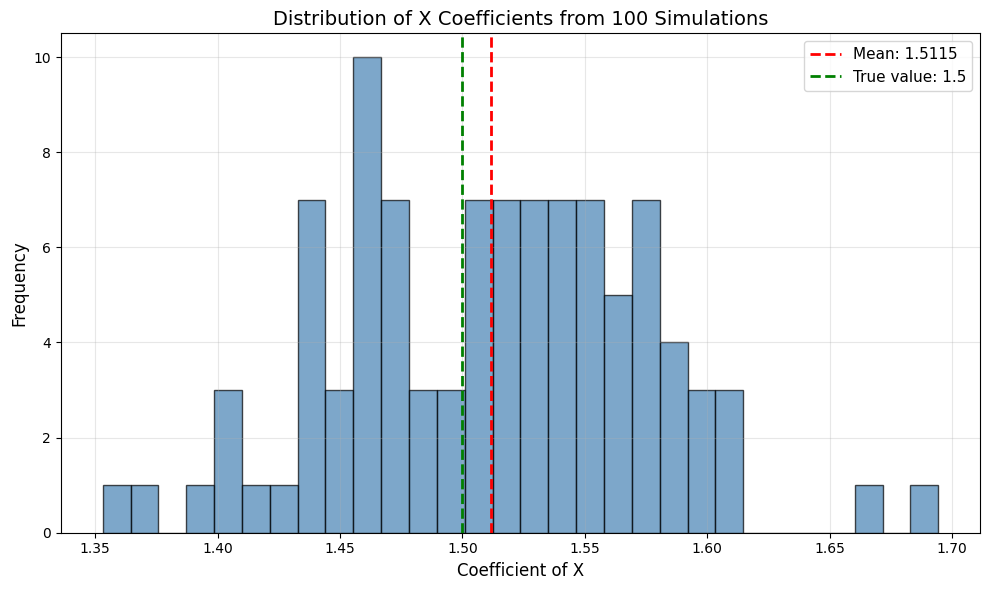


Note: The simulation SE (0.062706) is approximately 1.80x
larger than Python's SE (0.034837).


In [9]:
# Comparison of the two methods
print("\n" + "="*60)
print("COMPARISON OF THE TWO METHODS")
print("="*60)
print(f"Method 1 (Python's SE):     {se_X_method1:.6f}")
print(f"Method 2 (Simulation SE):   {se_X_method2:.6f}")
print(f"\nDifference:                 {abs(se_X_method1 - se_X_method2):.6f}")
print(f"Ratio (Method 2 / Method 1): {se_X_method2 / se_X_method1:.4f}")
print("="*60)

# Visualize the distribution of simulated coefficients
plt.figure(figsize=(10, 6))
plt.hist(coef_X_simulations, bins=30, alpha=0.7, edgecolor='black', color='steelblue')
plt.axvline(mean_coef_X, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_coef_X:.4f}')
plt.axvline(1.5, color='green', linestyle='--', linewidth=2, label='True value: 1.5')
plt.xlabel('Coefficient of X', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of X Coefficients from 100 Simulations', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nNote: The simulation SE ({se_X_method2:.6f}) is approximately {se_X_method2/se_X_method1:.2f}x")
print(f"larger than Python's SE ({se_X_method1:.6f}).")